This notebook is used to produce Figures 7-9 in the notes: steady-state solutions for some different parameter choices.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# add path to code
import sys
sys.path.insert(0, '../code')
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.fft import ifft2,fft2
from operators import compute_u,compute_w,compute_h,compute_s,h_steady,s_steady
from params import *

Define the melt-rate perturbation:

In [3]:
sigma = 10.0/3.0                                                    # standard deviation for gaussian melt anomaly

# For Figure 8 (melting) set:
m = 5*np.exp(-0.5*(sigma**(-2))*(x**2+y**2 ))*(t_r/3.154e7)/H     # melt anomaly with amplitude of 5 m/yr

# For Figure 9 and 10 set the negative version (freeze-on):
# m = 5*np.exp(-0.5*(sigma**(-2))*(x**2+y**2 ))*(t_r/3.154e7)/H    # melt anomaly with amplitude of 5 m/yr


Define a vertical exaggeration for plotting the elevations (since these ones are a small fraction of the ice thickness):

In [4]:
ex = 4e1   # vertical exaggeration factor

First we compute the solutions with a non-advective background state ($\alpha=0$). The only annoying thing here is interpolating the velocities onto the deformed grid defined by $z\mapsto (1-z)\gamma s + z\gamma h $ (for plotting), where $\gamma$ is the vertical exaggeration factor.

In [5]:
# First compute the elevation solutions

alpha = 0
h = h_steady(m,alpha)
s = s_steady(m,alpha)

# # extract the centerline profiles 
yc = int(Ny/2.)     # y index at centerline         
hc = h[-1,:,yc] 
sc = s[-1,:,yc]
mc = m[-1,:,yc]


Nz = 21
z_plt = np.linspace(0,1,num=Nz)
U = np.zeros((Nt,Nx,Ny,Nz))
W = np.zeros((Nt,Nx,Ny,Nz))

for i in range(Nz):
    U[:,:,:,i] = compute_u(h,s,z_plt[i])
    W[:,:,:,i] = compute_w(h,s,z_plt[i])

step = 1
x_plt = x0
Uc = U[-1,:,yc,:]
Wc = W[-1,:,yc,:]


# Next we interpolate the velocity solutions on the deformed grid for plotting

x_g,z_g = np.meshgrid(x_plt,z_plt)

z_d = (1-z_g)*ex*sc + z_g*(ex*hc+1)

nxi = 101
nzi = 101

xi = np.linspace(x_g.min(),x_g.max(),num=nxi)
zi = np.linspace(z_d.min(),z_d.max(),num=nzi)

Xi,Zi = np.meshgrid(xi,zi)

points = (x_g.flatten(),z_d.flatten())
points_i = (Xi,Zi)

Uc = griddata(points=points,values=Uc.T.flatten(), xi=points_i,fill_value=0)
Wc = griddata(points=points,values=Wc.T.flatten(), xi=points_i,fill_value=0)

speed = np.sqrt(Uc**2 + Wc**2)
max_speed = np.max(speed)


In [6]:
# Print some sanity-check information:
print('With the scales in params.py:')
print('max u = '+str(np.max(np.abs(Uc))*3.154e7*H/t_r)+' m/yr')
print('max w = '+str(np.max(np.abs(Wc))*3.154e7*H/t_r)+' m/yr')
print('max h = '+str(np.max(np.abs(hc))*H)+' m')
print('max s = '+str(np.max(np.abs(sc))*H)+' m')

With the scales in params.py:
max u = 7.533260445836272 m/yr
max w = 4.946547577377723 m/yr
max h = 0.6992827689419935 m
max s = 7.744788844682456 m


Repeat the above steps for a positive value of the background advection parameter:

In [7]:
alpha_2 = 2e-1
m_2 = -5*np.exp(-0.5*(sigma**(-2))*(x**2+y**2 ))*(t_r/3.154e7)/H
h_2 = h_steady(m_2,alpha_2)
s_2 = s_steady(m_2,alpha_2)
hc_2 = h_2[-1,:,yc] 
sc_2 = s_2[-1,:,yc]
mc_2 = m_2[-1,:,yc]

Nz = 21
U_2 = np.zeros((Nt,Nx,Ny,Nz))
W_2 = np.zeros((Nt,Nx,Ny,Nz))

for i in range(Nz):
    U_2[:,:,:,i] = compute_u(h_2,s_2,z_plt[i])
    W_2[:,:,:,i] = compute_w(h_2,s_2,z_plt[i])

step = 1
x_plt = x0
Uc_2 = U_2[-1,:,yc,:]
Wc_2 = W_2[-1,:,yc,:]

# Next we interpolate the velocity solutions on the deformed grid for plotting

x_g,z_g = np.meshgrid(x_plt,z_plt)

z_d = (1-z_g)*ex*sc_2 + z_g*(ex*hc_2+1)

xi_2 = np.linspace(x_g.min(),x_g.max(),num=nxi)
zi_2 = np.linspace(z_d.min(),z_d.max(),num=nzi)

Xi_2,Zi_2 = np.meshgrid(xi_2,zi_2)

points = (x_g.flatten(),z_d.flatten())
points_i = (Xi_2,Zi_2)

Uc_2 = griddata(points=points,values=Uc_2.T.flatten(), xi=points_i,fill_value=0)
Wc_2 = griddata(points=points,values=Wc_2.T.flatten(), xi=points_i,fill_value=0)

speed_2 = np.sqrt(Uc_2**2 + Wc_2**2)
max_speed_2 = np.max(speed_2)

In [8]:
# Print some sanity-check information:
print('With the scales in params.py:')
print('max u = '+str(np.max(np.abs(Uc_2))*3.154e7*H/t_r)+' m/yr')
print('max w = '+str(np.max(np.abs(Wc_2))*3.154e7*H/t_r)+' m/yr')
print('max h = '+str(np.max(np.abs(hc_2))*H)+' m')
print('max s = '+str(np.max(np.abs(sc_2))*H)+' m')

With the scales in params.py:
max u = 6.212256392970472 m/yr
max w = 3.3984487375071297 m/yr
max h = 0.479962121880162 m
max s = 5.310683526274053 m


Plot both solutions:

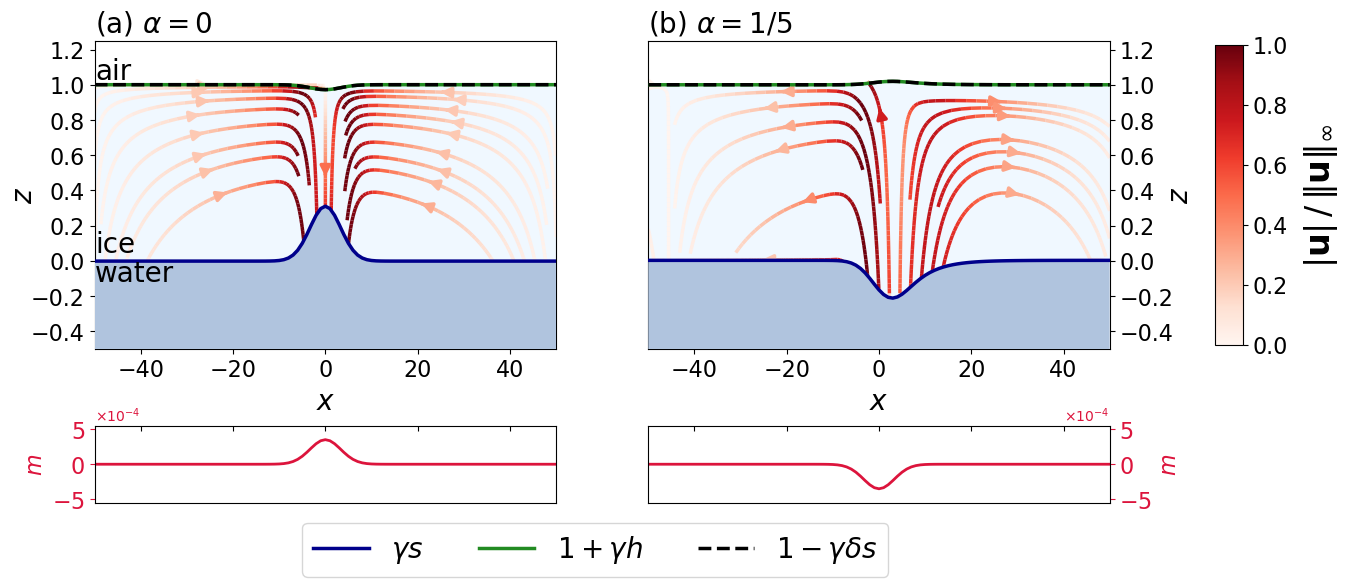

In [9]:
plt.close()
fig = plt.figure(figsize=(14,4))

plt.subplot(121)
plt.title(r'(a) $\alpha=0$',fontsize=20,loc='left',zorder=100)
plt.plot(x0,ex*sc,linewidth=2.5,color='darkblue',zorder=16,label=r'$\gamma s$')
plt.plot(x0,ex*hc+1,linewidth=2.5,color='forestgreen',zorder=13,label=r'$1+\gamma h$')
plt.plot(x0,ex*(-delta*sc)+1,linewidth=2.5,color='k',linestyle='--',zorder=80)
plt.fill_between(x0,y1=ex*sc, y2=ex*hc+1,facecolor='aliceblue',alpha=1.0)
plt.fill_between(x0,y1=-2*np.ones(np.size(x0)), y2=ex*sc,facecolor='lightsteelblue',alpha=1,zorder=15)
stream = plt.streamplot(xi,zi,Uc/max_speed,Wc/max_speed,color=speed/max_speed,arrowsize=1.5,linewidth=2.5,minlength=0.8,density=1.5,cmap='Reds')
plt.annotate(xy=(-L+0.1,1.03),text='air',fontsize=20,zorder=30)
plt.annotate(xy=(-L+0.1,0.05),text='ice',fontsize=20,zorder=31)
plt.annotate(xy=(-L+0.1,-0.12),text='water',fontsize=20,zorder=32)
    
plt.ylabel(r'$z$',fontsize=20,labelpad=-5)
plt.xlabel(r'$x$',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.5,1.25)
plt.xlim(-L,L)

axins = plt.gca().inset_axes([0.0, -0.5,1, 0.25],sharex=plt.gca())
axins.plot(x0,mc,linewidth=2,color='crimson',linestyle='-')
axins.set_ylabel(r'$m$',fontsize=16,color='crimson')
axins.set_ylim(-np.abs(m).max()-2e-4,np.abs(m).max()+2e-4)
axins.tick_params(axis='y', which='major', labelsize=16,color='crimson',labelcolor='crimson')
axins.tick_params(axis='x',direction="in",which='major', labelsize=16,top=True, labeltop=True, bottom=False, labelbottom=False)
axins.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4),useMathText=True)
plt.setp(axins.get_xticklabels(), visible=False)

plt.subplot(122)
plt.title(r'(b) $\alpha={1}/{5}$',fontsize=20,loc='left',zorder=100)

plt.plot(x0,ex*sc_2,linewidth=2.5,color='darkblue',zorder=16,label=r'$\gamma s$')
plt.plot(x0,ex*hc_2+1,linewidth=2.5,color='forestgreen',zorder=13,label=r'$1+\gamma h$')

# # vv hydrostatic thickness profile vv
plt.plot(x0,ex*(-delta*sc_2)+1,linewidth=2.5,color='k',linestyle='--',zorder=80,label=r'$1-\gamma\delta s$')

plt.fill_between(x0,y1=ex*sc_2, y2=ex*hc_2+1,facecolor='aliceblue',alpha=1.0)
plt.fill_between(x0,y1=-2*np.ones(np.size(x0)), y2=ex*sc_2,facecolor='lightsteelblue',alpha=1,zorder=15)
stream = plt.streamplot(xi_2,zi_2,Uc_2/max_speed_2,Wc_2/max_speed_2,color=speed_2/max_speed_2,arrowsize=1.5,linewidth=2.5,minlength=0.8,density=1.5,cmap='Reds')
plt.legend(fontsize=20,ncol=3,bbox_to_anchor=(0.55,-0.52))
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$z$',fontsize=20,labelpad=-5)
plt.xticks(fontsize=16)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.yticks(fontsize=16)
plt.ylim(-0.5,1.25)
plt.xlim(-L,L)

axins = plt.gca().inset_axes([0.0, -0.5,1, 0.25],sharex=plt.gca())
axins.plot(x0,mc_2,linewidth=2,color='crimson',linestyle='-')
axins.set_ylabel(r'$m$',fontsize=16,color='crimson')
axins.yaxis.set_label_position("right")
axins.set_ylim(-np.abs(m_2).max()-2e-4,np.abs(m_2).max()+2e-4)
axins.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4),useMathText=True)
axins.yaxis.set_offset_position('right')
axins.tick_params(axis='y', which='major', labelsize=16,color='crimson',labelcolor='crimson',left=False, labelleft=False, right=True, labelright=True)
axins.tick_params(axis='x',direction="in",which='major', labelsize=16,top=True, labeltop=True, bottom=False, labelbottom=False)
plt.setp(axins.get_xticklabels(), visible=False)

fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.925, 0.12, 0.02, 0.75])
cbar = fig.colorbar(stream.lines,cax=cbar_ax,orientation='vertical')
cbar.ax.tick_params(labelsize=16)
cbar.set_label(r'$|\mathbf{u}|\,/\, \Vert\mathbf{u}\Vert_\infty$',fontsize=24,labelpad=10)
cbar.ax.tick_params(labelsize=16)

plt.savefig('profiles',bbox_inches='tight')
plt.show()

Yay! Notes: the dashed line at the upper surface is the perfect flotation thickness and the flow speed has been normalized by its maximum absolute value.